# Task 1
## Diffusion Maps

In [11]:
from task2.diffusion_maps import DiffusionMap
from task2.diffusion_maps import get_part_one_dataset, plot_fourier
from pca import *

import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

#### Task2.1: compute five eigenfunctions $\phi_l$ associated to the largest eigenvalues $\lambda_l$ with Diffusion Maps, on a periodic data set with N = 1000 points given by (see exercise sheet, task2)

doing task2.1


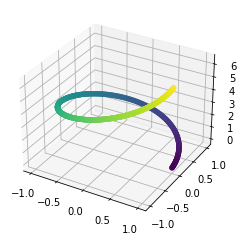

(1000, 1000)


D:\UniPi\erasmus\courses\MLCS\MLCMS-exercises\EX4\task2\diffusion_maps.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


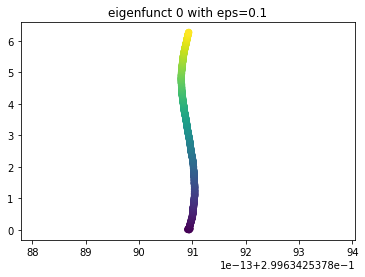

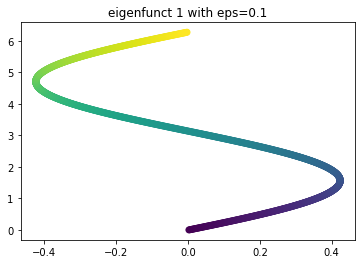

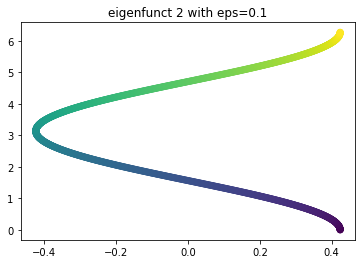

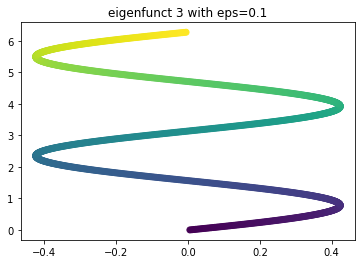

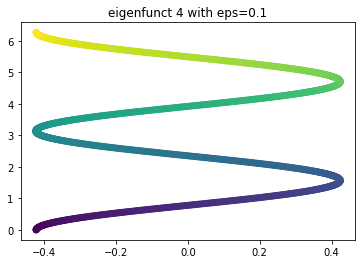

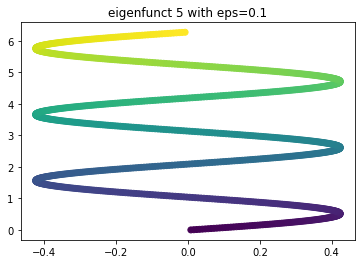

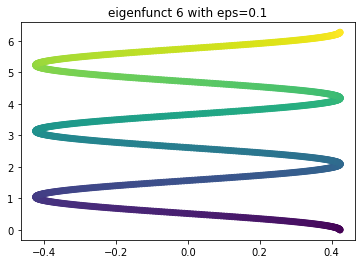

In [7]:
# task2.1
print("doing task2.1")
x, t = get_part_one_dataset()
visualize = True
if visualize:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x[:, 0], x[:, 1], t, c=t)
    plt.show()
dm = DiffusionMap()
phi_l, eps = dm.execute_algorithm(x)
if visualize:
    for i in range(phi_l.shape[1]):
        dm.plot_2D_diffusion_maps_task_one(phi_l[:, i], i, t, eps)

    

#### Task2.2: Use the algorithm to obtain the first ten eigenfunctions of the Laplace Beltrami operator on the $\textit{swiss roll}$ manifold,

doing task2.2


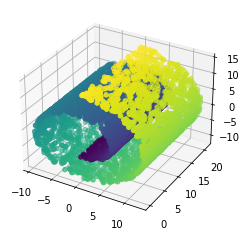

(5000, 5000)
algorithm executed


D:\UniPi\erasmus\courses\MLCS\MLCMS-exercises\EX4\task2\diffusion_maps.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


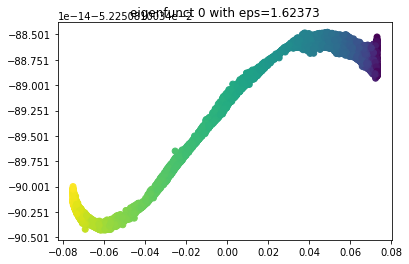

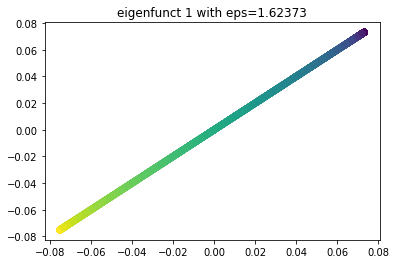

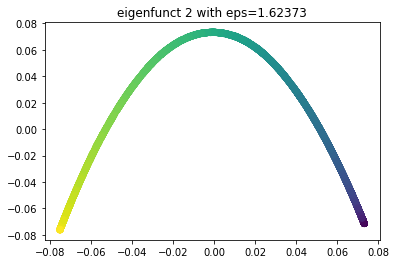

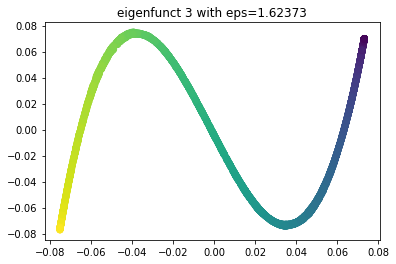

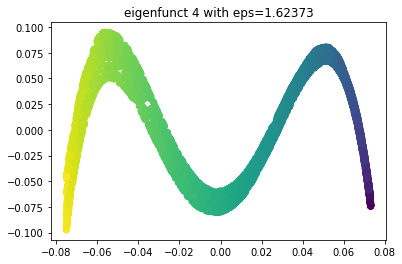

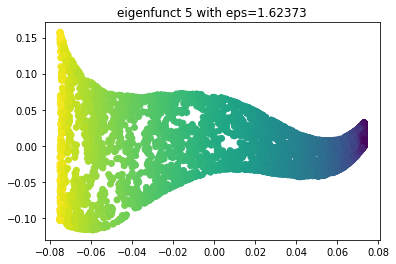

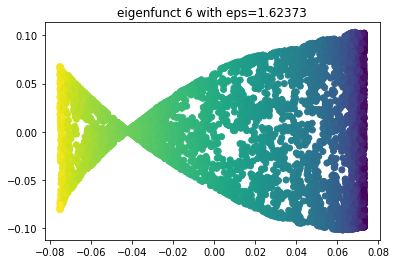

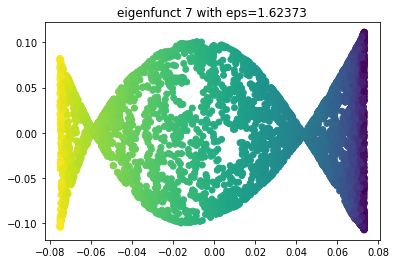

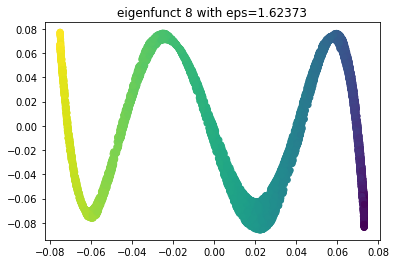

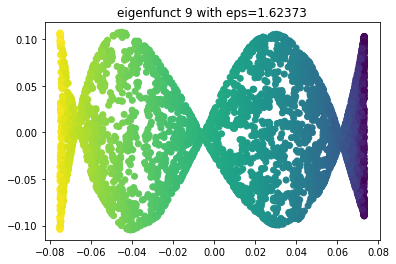

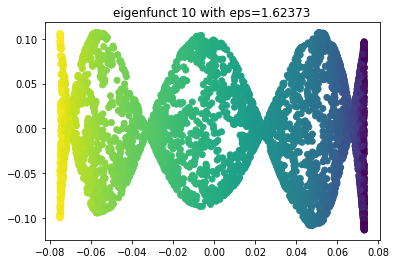

In [10]:
# task2.2
print("doing task2.2")
num_samples = 5000
x, t = make_swiss_roll(num_samples)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t)
plt.show()

dm = DiffusionMap()
phi_l, eps = dm.execute_algorithm(x, L=10)
print("algorithm executed")
for i in range(phi_l.shape[1]):
    dm.plot_2D_diffusion_maps_task_two(phi_l[:, 1], phi_l[:, i], i, t, eps)

Compute the three principal
components of the swiss-roll dataset

In [36]:
U, S, V = svd(x, center=True)

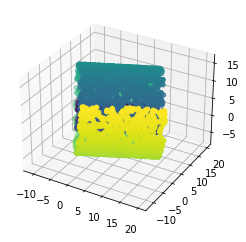

In [39]:
fig = plt.figure()
reconstruction = U@S@V + np.mean(x)
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=t)
plt.show()

In [42]:
singular_values = np.diagonal(S)
energy_3 = np.sum(np.square(singular_values[:3])) / np.sum(np.square(singular_values))
energy_2 = np.sum(np.square(singular_values[:2])) / np.sum(np.square(singular_values))
energy_1 = np.sum(np.square(singular_values[:1])) / np.sum(np.square(singular_values))
energy_3, energy_2, energy_1

(1.0, 0.7142764015236756, 0.3958229309999032)

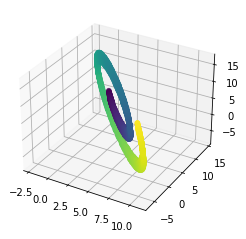

In [40]:
fig = plt.figure()
new_S = S.copy()
new_S[2,2] = 0
reconstruction = U@new_S@V + np.mean(x)
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=t)
plt.show()

What happens if only 1000 data points are used?

doing task2.2


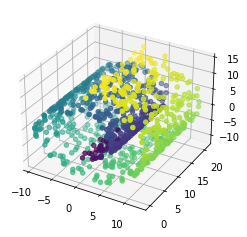

(1000, 1000)
algorithm executed


D:\UniPi\erasmus\courses\MLCS\MLCMS-exercises\EX4\task2\diffusion_maps.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


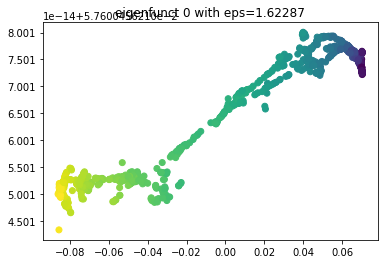

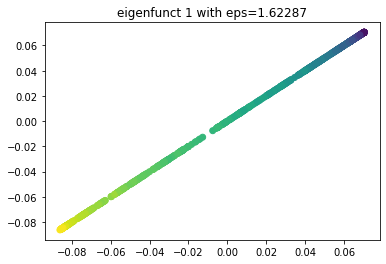

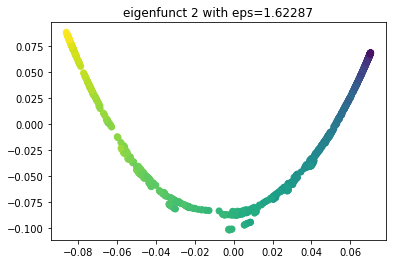

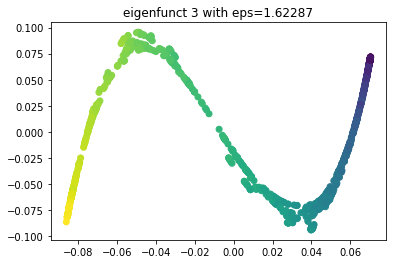

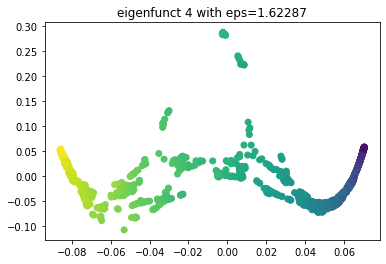

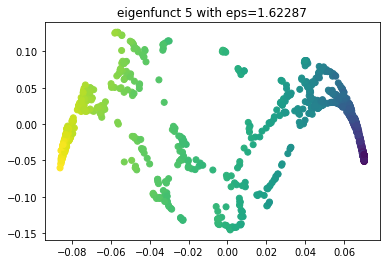

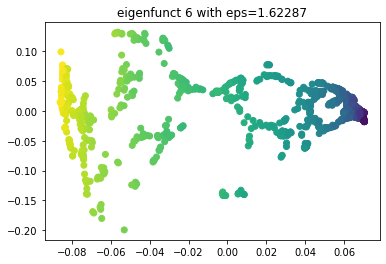

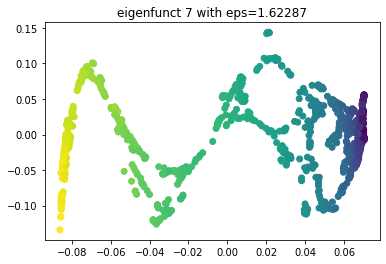

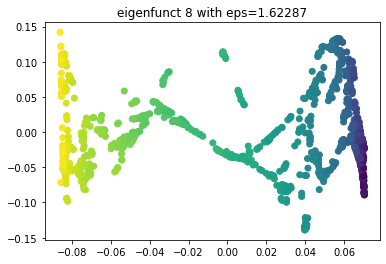

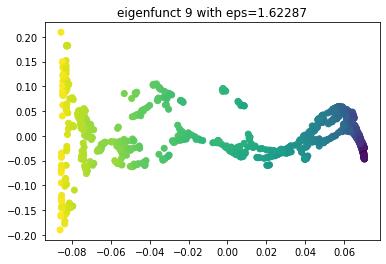

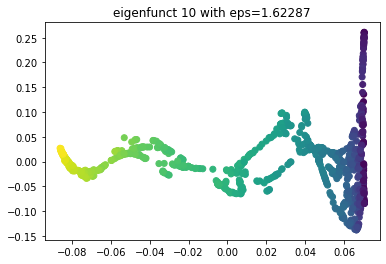

In [55]:
# task2.2
print("doing task2.2")
num_samples = 1000
x, t = make_swiss_roll(num_samples)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t)
plt.show()

dm = DiffusionMap()
phi_l, eps = dm.execute_algorithm(x, L=10)
print("algorithm executed")
for i in range(phi_l.shape[1]):
    dm.plot_2D_diffusion_maps_task_two(phi_l[:, 1], phi_l[:, i], i, t, eps)

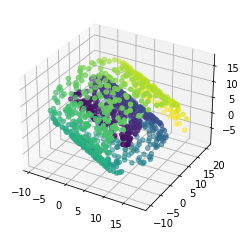

(1.0, 0.7257370197280759, 0.4123080202549025)

In [56]:
U, S, V = svd(x, center=True)
fig = plt.figure()
reconstruction = U@S@V + np.mean(x)
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=t)
plt.show()
singular_values = np.diagonal(S)
energy_3 = np.sum(np.square(singular_values[:3])) / np.sum(np.square(singular_values))
energy_2 = np.sum(np.square(singular_values[:2])) / np.sum(np.square(singular_values))
energy_1 = np.sum(np.square(singular_values[:1])) / np.sum(np.square(singular_values))
energy_3, energy_2, energy_1

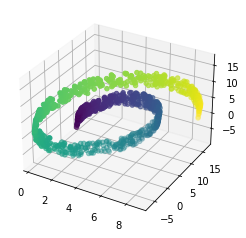

In [57]:
fig = plt.figure()
new_S = S.copy()
new_S[2,2] = 0
reconstruction = U@new_S@V + np.mean(x)
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=t)
plt.show()